Task1_0806. 다음 사항을 준수하여 Fashion MNINS 데이터셋에 대하여 Sequential 방식으로 모델 생성 및 평가를 수행하세요.
- 입력 계층 및 첫 번째 Dense 계층 : 출력 512, activation='relu'
- 두 번째 Dense 계층 : 출력 256, activation='relu'
- 출력 계층 : 출력 10, activation='softmax'
- 모델 컴파일 : optimizer='adam', loss='categorical_crossentropy',         metrics=['accuracy']
- 모델 학습 : epochs=10, batch_size=64
<br>
layers.InputLayer(input_shape=(28*28,)),
<br>
기존이 MNIST 데이터셋과 같은 형식을 가지고 있지만, 손으로 쓴 숫자 대신에 10가지 범주의 패션 아이템(티셔츠, 바지, 신발)의 이미지로 구정

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 데이터 전처리
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 레이블을 원-핫 인코딩
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# 모델 정의
model = models.Sequential()

# 모델 구성
model.add(layers.InputLayer(input_shape=(28, 28)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # 첫 번째 완전 연결 레이어
model.add(layers.Dense(256, activation='relu'))  # 두 번째 연결 레이어
model.add(layers.Dense(10, activation='softmax'))  # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'모델 정확도 : {test_acc}')


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7872 - loss: 0.5981
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8657 - loss: 0.3641
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8822 - loss: 0.3196
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8904 - loss: 0.2948
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.2681
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8999 - loss: 0.2661
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9078 - loss: 0.2463
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9076 - loss: 0.2392
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9145 - loss: 0.2225
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9187 - loss: 0.2117
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8880 - loss: 0.3191
모델 정확도 : 0.8862000107765198


# 강사님 버전

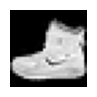

In [19]:
import matplotlib.pyplot as plt

train_images[0].shape

image_data = train_images[0]

plt.figure(figsize=(1, 1))
plt.imshow(image_data, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 데이터를 0과 1 사이의 값으로 정규화
train_images = train_images / 255
test_images = test_images / 255

# 이미지 데이터를 1D 벡터로 변환 (28x28 이미지를 784 크기의 벡터로 평탄화)
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

# 레이블을 원-핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 첫번째 방법
# # 모델 정의
# model = models.Sequential()

# # 모델 구성
# model.add(layers.InputLayer(input_shape=(28*28,)))
# model.add(layers.Dense(512, activation='relu'))  # 첫 번째 완전 연결 레이어
# model.add(layers.Dense(256, activation='relu'))  # 두 번째 연결 레이어
# model.add(layers.Dense(10, activation='softmax'))  # 출력 레이어

# 두번째 방법
model = models.Sequential([
    layers.InputLayer(shape=(28*28,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'모델 정확도 : {test_acc}')


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7832 - loss: 0.6101
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8686 - loss: 0.3575
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8831 - loss: 0.3187
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8930 - loss: 0.2892
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8945 - loss: 0.2752
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9036 - loss: 0.2553
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9077 - loss: 0.2434
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9120 - loss: 0.2284
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9174 - loss: 0.2183
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2112
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8891 - loss: 0.3239
모델 정확도 : 0.8895000219345093


In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 데이터를 0과 1 사이의 값으로 정규화
train_images = train_images / 255
test_images = test_images / 255

# 레이블을 원-핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 이미지 차원 변경 (모델에 맞게 차원 추가)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))



model = models.Sequential([
    # 컨볼루션 레이어 추가
    layers.InputLayer(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),   # 32은 필터의 개수, (3, 3) 은 필터의 사이즈
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Dense 레이터 추가
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'모델 정확도 : {test_acc}')


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7190 - loss: 0.7714
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8739 - loss: 0.3496
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8908 - loss: 0.2988
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9017 - loss: 0.2640
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9108 - loss: 0.2403
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9201 - loss: 0.2180
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9260 - loss: 0.2001
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9329 - loss: 0.1797
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9382 - loss: 0.1656
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9423 - loss: 0.1544
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9142 - loss: 0.2704
모델 정확도 : 0.9146000146865845
